# Utility Functions

## Importing libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import OrderedDict

## Function to read image

In [80]:
def read_image(image):
    
    img = mpimg.imread(image)
    return img

## Function to convert image to numpy array

In [81]:
def pre_processing(image):
    
    arr = np.asarray(image)
    return arr

## Function to define averaging filter

In [82]:
def average_filter():
    
#   kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
    filter_matric = np.empty((3,3))
    filter_matric.fill(1/9)
    return filter_matric

## Function to add padding

In [89]:
def add_padding(img_arr):
    
    #This function first create padded array of ones with same rows and column size as orignal image array plus two more rows and columns
    # then it simply put the image array onto the padded array
    
    
    rows, cols = img_arr.shape
    padded_array_r_c = rows + 2
    img_pad = np.ones((padded_array_r_c,padded_array_r_c))
    img_pad[1:rows+1,1:cols+1] = img_arr
    
    #build in function for padding
    #img_pad = np.pad(img_arr, ((1, 1), (1, 1)), 'constant', constant_values = (1,)) 
    
    return img_pad

## Function to convolve image with filter

In [85]:
def convolve_with_filter(image_arr, filter_matric):
    
    # convolution output matric having an array of zeros with the same shape and type as a given array.
    output = np.zeros_like(image_arr)
    
    #adding padding of 1s
    image_padded = add_padding(image_arr)
    
     # Loop over every pixel of the image
    for x in range(image_arr.shape[0]):
        for y in range(image_arr.shape[1]):
            
            #select pixels of image for convolution operation
            block = image_padded[x: x+3, y: y+3]
            
            # Now we do element-wise multiplication of the filter and the image
            
            # slow and naive method to do convolution operation!!!
            convolve_result = 0
            for i in range(len(filter_matric)):
                for j in range(len(filter_matric)):
                    convolve_result+= block[i][j] * filter_matric[i][j]
             
            # Faster way to do convolution operation.
            #output[x, y]=(filter_matric * block).sum() 
                                                        
            
            
            output[x, y] = convolve_result
            
    return output

## Function to visualize filtered images

In [90]:
def visualize_images(filtered_images):
    
    fig, ax = plt.subplots(nrows=7,ncols=1, figsize=(50,42))
    count = 0
    for img_title,img in filtered_images.items():
        _ = ax[count].title.set_text(img_title)
        _ = ax[count].imshow(img, cmap='gray', vmin=0, vmax=255)
        count=count + 1

<hr style="border:2px solid gray"> </hr>

## Main  Function

<ol>
  <p>Steps followed in main function to solve the problem:</p>
    <br>
  <li>First load the image using read_image function.</li>
  <li>Convert the image to numpy array using pre_processing function.</li>
  <li>Get filter matrix using average_filter function.</li> 
  <li>Create a ordered dictionary of filtered_images. This ordered dictionary will help later when we display results.</li> 
  <li>First save the orignal image in filtered images dictionary.</li>
  <li>Then take orignal image and pass it through convolve_with_filter function to get filtered image. Then save this
    filtered image to filtered images dictionary with its count.</li>
  <li>In the next iteration we will pass the previous filtered image as input to convolve_with_filter function to get the new filtered image.</li>
   <li>Finally we will pass the filtered images dictionary to visualize_images function to display results .</li>
</ol>

In [91]:
def main():
    
    path_to_image = "lena_gray.jpg"

    img = read_image(path_to_image)
    img_to_arr = pre_processing(img)
    filter_mat = average_filter()

    # filtered_images = {}
    filtered_images = OrderedDict()
    filtered_images["Orignal_Image"] = img_to_arr

    for count in range(1,7):
        filtered_image = convolve_with_filter(img_to_arr,filter_mat)
        filter_num = f"Filter_Image_{count}"
        filtered_images[filter_num] = filtered_image
        img_to_arr = filtered_image
    
    visualize_images(filtered_images)


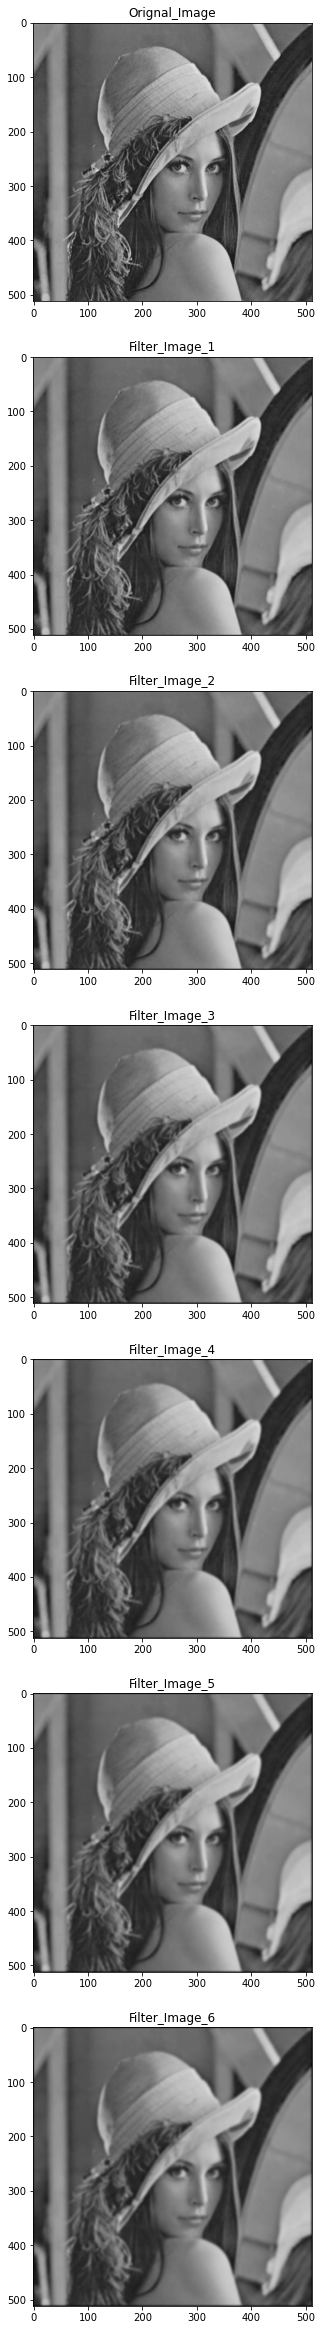

In [92]:
if __name__ == "__main__":
    main()

## Analysis on results of applying the filter multiple times

<p>Above results shows that applying filter on image multiple times make it more blurr. In order words, after applying filter to image, we get more smoother image. Also, the filter that we have used is commonly used to remove noise in image and make it more smoother. The same effects can be seen in above results as well.</p>